<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Principles of Data Visualization

---

## Learning Objectives
- Identify what type of visualization may be appropriate for a given scenario.
- Generate bar graphs, histograms, scatter plots, and line plots in `matplotlib`.
- Generate heat maps in `seaborn`.
- Critique data visualizations and implement changes.

<details><summary>Let's get started with a question: what is the point of creating a visualization for data?</summary>
    
- "Use a picture. It's worth a thousand words." - Tess Flanders, 1911
- We generally use visualizations in order to efficiently and/or effectively communicate information.
</details>

## First, what *not* to do...

<img src="./images/bad1.jpg" style="height: 500px">

<details><summary>What is wrong with the above visualization?</summary>
    
- The y-axis is flipped - most people expect 0 to be at the bottom of the graph, providing a misleading graph for people who just glance at the visualization.
</details>

<img src="./images/bad2.jpg" style="height: 400px">

*Above images from [this source](https://teachdatascience.com/ethicaldataviz/).*

<details><summary>What is wrong with the above visualization?</summary>
    
- The x-axis is not arranged according to dates, but according to cases. This shows a misleading decline in cases that does not actually exist.
</details>

<img src="./images/bad3.png" style="height: 350px">

*Above image from [this source](https://www.datarevelations.com/resources/hey-your-tableau-public-viz-sucks-revisited/).*

<details><summary>What is wrong with the above visualization?</summary>
    
- In general, this graph is not super clear. The reader is unsure of what is being conveyed here.
- The main problem with this visual is the color scale! As a general rule, never use red and green together in a visualization. Stick with accessible, color blind friendly color palettes. Read more about this [here](https://venngage.com/blog/color-blind-friendly-palette/).
</details>

You can see more bad visualizations [here](https://viz.wtf/)!

## What to do...

1. Less is more. Get rid of everything you don’t need and only focus on what you are trying to communicate.
> “Above all else show the data.” “Graphical excellence consists of complex ideas communicated with clarity, precision, and efficiency.”  
> - Tufte in [Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/1930824130)
2. Use color to help communicate
> Color should be used to emphasize, not distract the audience. We can use color to draw the audience's eyes where we want them to look. If you are concerned that your image is too "cluttered," then consider toning down your use of color.
3. Design for Accessibility
> Color Blindness/ Color Vision Deficiency (CVD) can take many forms. Red-green is 99% of cases.  
> - "Red–green color blindness is the most common form, followed by blue–yellow color blindness and total color blindness. Red–green color blindness affects up to 8% of males and 0.5% of females of Northern European descent." - [Wikipedia](https://en.wikipedia.org/wiki/Color_blindness)

### Let's do it!

First, let's download our data. This data is from [Kaggle](https://www.kaggle.com/crawford/80-cereals?select=cereal.csv) and is part of a [Makeover Monday challenge](https://www.makeovermonday.co.uk/data/) to improve a visualization.

<img src="./images/cereal.jpeg" style="height: 35==200px">

In [7]:
!pip install matplotlib

     |████████████████████████████████| 7.3 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 81.5 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 880 kB 40.4 MB/s eta 0:00:01


In [50]:
!pip install seaborn

     |████████████████████████████████| 292 kB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 33.2 MB 19.7 MB/s eta 0:00:01


In [51]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import and view cereal data
cereal = pd.read_csv('./data/cereal.csv')

In [4]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [6]:
cereal.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


## Bar Charts

> "A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent." -[Wikipedia](https://en.wikipedia.org/wiki/Bar_chart)

In [10]:
# Get top 10 most sugary cereals, save as a variable
sugary = cereal.sort_values(by='sugars', ascending= False)[:10]

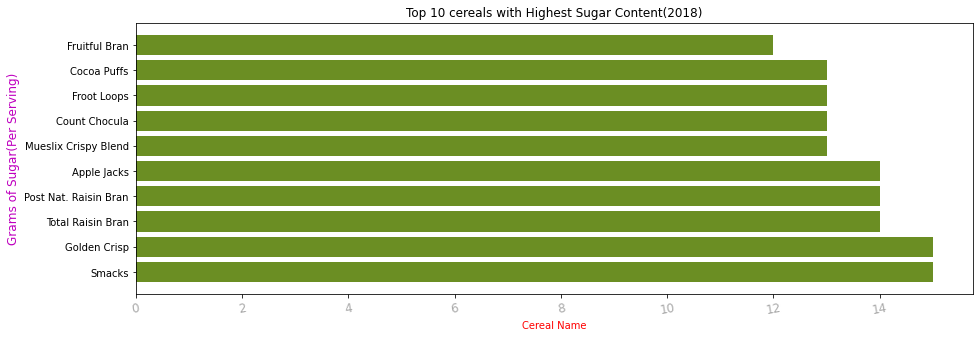

In [33]:
# Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals
plt.figure(figsize=(15,5))
plt.barh(sugary['name'],
       sugary['sugars'], color='olivedrab')


plt.xticks(rotation = 10, size=12, c='darkgrey')
plt.ylabel('Grams of Sugar(Per Serving)', size = 12, c='m')
plt.xlabel('Cereal Name', c='r')
plt.title('Top 10 cereals with Highest Sugar Content(2018)', horizontalalignment='center');

In [ ]:
# plt.barh() will create a horizontal bar chart. (Note the h at the end of bar!)


## Histograms
> Histograms are used to display the distribution of numerical data.

''

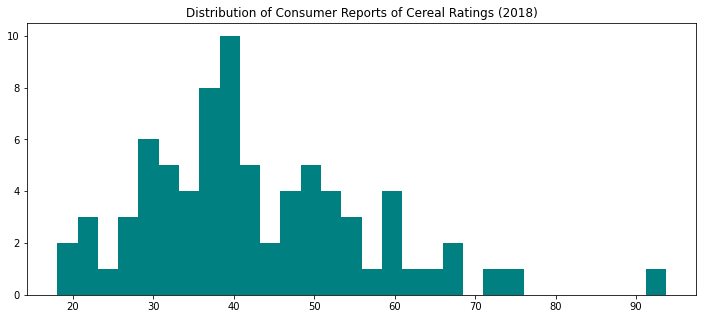

In [44]:
# Let's plot a histogram of cereal rating
# Size
plt.figure(figsize=(12,5))

# Plot it
plt.hist(cereal['rating'], bins=30,color='teal')

# colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# Create a descriptive title
plt.title("Distribution of Consumer Reports of Cereal Ratings (2018)")


# Do we need axis lables here?
;

## Scatter Plots
> Scatter plots are used to display the relationship between two variables.

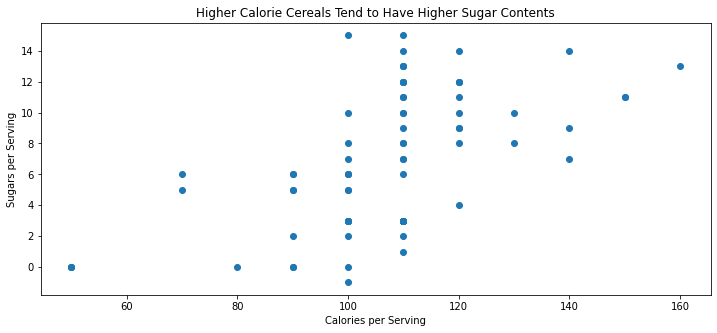

In [48]:
# Let's create a scatter plot of calories vs. sugar

# Size
plt.figure(figsize=(12,5))

# Scatter plot
plt.scatter(cereal['calories'], cereal['sugars'])
# Create a descriptive title
plt.title('Higher Calorie Cereals Tend to Have Higher Sugar Contents')

# Add axis labels
plt.xlabel("Calories per Serving")
plt.ylabel("Sugars per Serving");

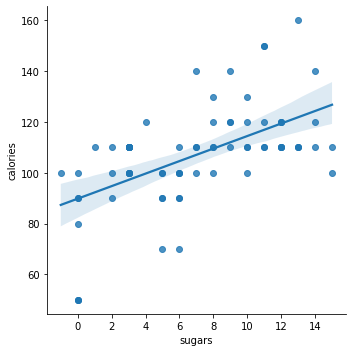

In [54]:
sns.lmplot(data=cereal, x='sugars', y='calories');

## Line Graphs
> Line graphs (also known as line plots or line charts) use lines to connect data points to show the changes in numerical values over time.

In [55]:
# Generate data over time
dates = pd.date_range('3-1-20', '7-30-20')
bowls_eaten = np.random.poisson(1, size = 152)

# dates = pd.date_range('3-1-20', '7-30-20')
# bowls_eaten = np.random.poisson(1, size = 152)

In [56]:
bowls_eaten

array([0, 0, 0, 3, 0, 3, 0, 0, 3, 2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0,
       1, 0, 0, 2, 3, 0, 1, 1, 3, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 4,
       0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 0, 0, 1, 1, 2, 3, 0, 1, 2, 0, 1, 0, 2, 4, 2, 0, 0, 3, 2,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2,
       0, 0, 3, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 3, 0, 0, 1])

''

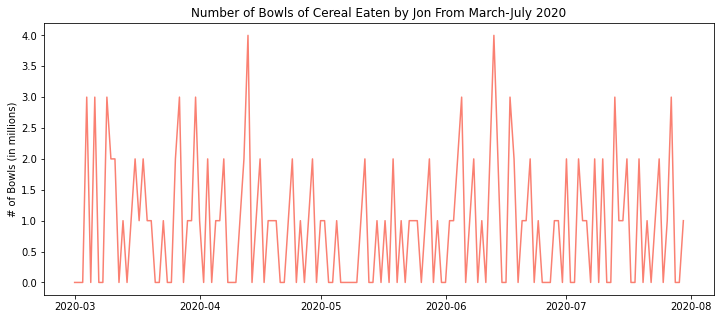

In [59]:
# Let's create a line plot of the number of bowls of cereal I've consumed

# Size
plt.figure(figsize=(12,5))
# Line plot
plt.plot(dates, bowls_eaten, color='salmon')
# Create a descriptive title
plt.title("Number of Bowls of Cereal Eaten by Jon From March-July 2020")
# Add axis labels
plt.ylabel("# of Bowls (in millions)")

;

## Heat Maps
> Heat maps use color to show the strength of a relationship between two or more variables.

A commonly seen implementation of a heatmap uses the [Seaborn library](https://seaborn.pydata.org).

''

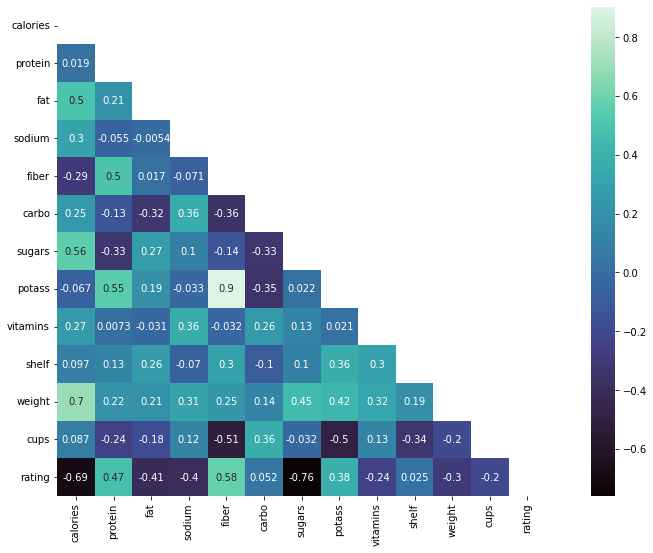

In [63]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize=(16,9))

# Get correlation of variables.
corr = cereal.corr()


# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, 
            mask=mask,
            square=True,
            cmap='mako',
            annot=True)
;

## Advanced: Subplots
> We can use subplots to easily compare multiple visualizations by sharing an axis.

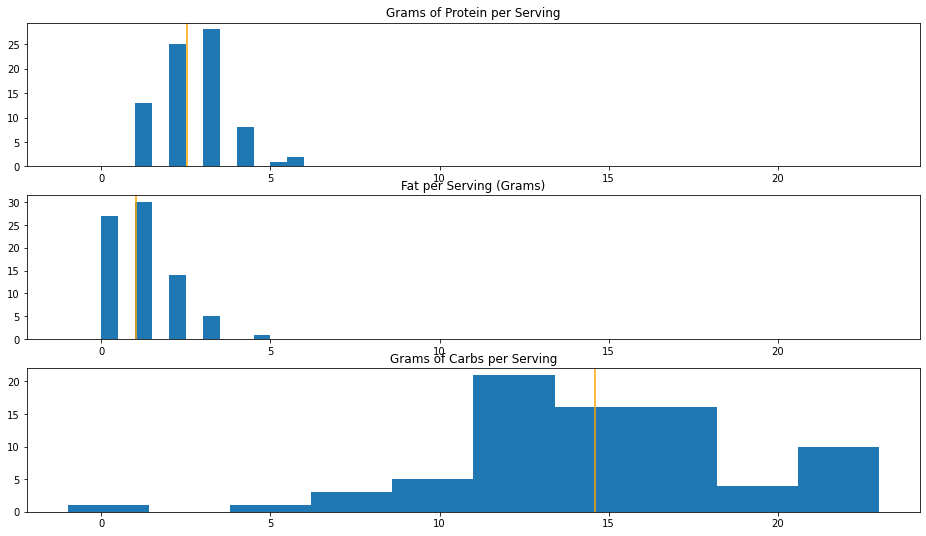

In [75]:
# Establish figure size.
plt.figure(figsize = (16,9))

# plt.figure(figize=(16,9))

# We can create subplots, which allows us to have multiple subplots in the same plot.
# plt.subplot(3, 1, 1) means we have 3 rows, 1 column, and are referencing plot 1.
# ax1 = plt.subplot(3, 1, 1)

ax1 = plt.subplot(3,1,1)
ax1.set_title("Grams of Protein per Serving")
ax1.hist(cereal['protein'])
ax1.axvline(x = np.mean(cereal['protein']), color = 'orange')

# # plt.subplot(3, 1, 2) means we have 3 rows, 1 column, and are referencing plot 2.

ax2 = plt.subplot(3, 1, 2, sharex=ax1)
ax2.hist(cereal['fat'])
ax2.set_title("Fat per Serving (Grams)")
ax2.axvline(x = np.mean(cereal['fat']), color = 'orange')

# # plt.subplot(3, 1, 3) means we have 3 rows, 1 column, and are referencing plot 3.

ax3 = plt.subplot(3, 1, 3, sharex=ax2)
ax3.set_title("Grams of Carbs per Serving")
ax3.hist(cereal['carbo'])
ax3.axvline(np.mean(cereal['carbo']), color = 'orange');
# plt.tight_layout(); # adds more space:

---

## More Visualization Libraries in Python

In this lesson, you saw the vanilla matplotlib API and [Seaborn](https://seaborn.pydata.org/) (which uses Matplotlib under the hood). Other Popular Python visualization libraries include the following, which can be used for more advanced plots (like maps) or for interactive plotting:
- [Bokeh](http://bokeh.pydata.org/en/latest/)
- [Altair](https://altair-viz.github.io/)
- [Plotly](https://plot.ly/python/getting-started/)

## Other Visualization Tools

A variety of non-programming tools are also used in industry. However, not all of these are great for repeated analysis, customizable, or free! For example:
- Excel
- Power BI
- Tableau

---

## Matplotlib gallery

See the possibilities of matplotlib [here](https://matplotlib.org/3.2.1/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py).
- These examples are to show what's possible. Don't feel you need to memorize any of them. 

---

## Choosing the Right Chart Type

**If-This-Then-That Guidelines**

### Just a number or two
If showing just one or two numbers, then:
   - simply report the numbers.
   - compare numbers using a bar chart.
   
### One Variable
If visualizing the distribution of one variable, then:
   - If the variable is qualitative, (categorical: nominal or ordinal): use a bar chart.
   - If the variable is quantitative (numeric: ratio or interval): use a histogram.
    
### Two Variables
If visualizing the relationship between two variables, then:
   - If both variables are quantitative, then:
       - If one variable is time, then use a line plot.
       - Otherwise, use a scatter plot - or a box plot if want to show stats.
   - If one variable is quantitative and another is qualitative, then use multiple histograms.
   - If both variables are qualitative, then:
       - Use a table or a heat map.

### Three+ Variables
- Use a heat map, box plot, or multiple scatter plots

That should cover 95%+ of cases you'll see. 😀


### Avoid...
- Pie Charts
- 3-D Charts